In [80]:
import numpy as np
import matplotlib.pyplot as plt

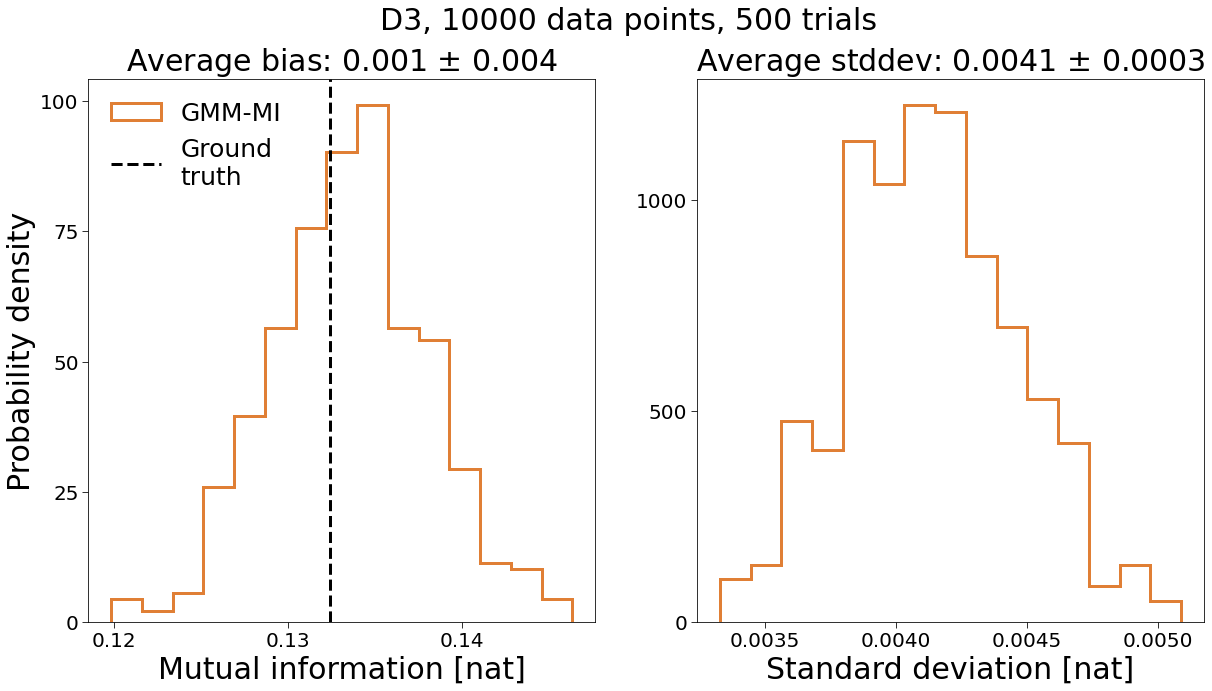

In [81]:
alpha=0.8
bins=15
fontsize=30
N=10000
nbins=5
label = 'D3'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')
color = '#d95f02'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True', 
         histtype='step', lw=3)
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label='Ground\ntruth')
ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
ax1.set_xlabel('Mutual information [nat]', fontsize=fontsize)
ax1.set_ylabel('Probability density', fontsize=fontsize)
ax1.locator_params(nbins=nbins)
ax1.legend(fontsize=25, frameon=False, loc='upper left')
ax1.set_title(f'Average bias: {np.mean(MI_file[:, 0]-analytic):.3f} $\pm$ {np.std(MI_file[:, 0]-analytic):.3f}', 
              fontsize=30)

ax2.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True',
         histtype='step', lw=3)
ax2.tick_params(axis='both', which='major', labelsize=20, size=6)
ax2.set_xlabel('Standard deviation [nat]', fontsize=fontsize)
ax2.locator_params(nbins=nbins)
ax2.set_title(f'Average stddev: {np.mean(MI_file[:, 1]):.4f} $\pm$ {np.std(MI_file[:, 1]):.4f}', 
              fontsize=30)

plt.suptitle(f'{label}, {N} data points, 500 trials', fontsize=fontsize);

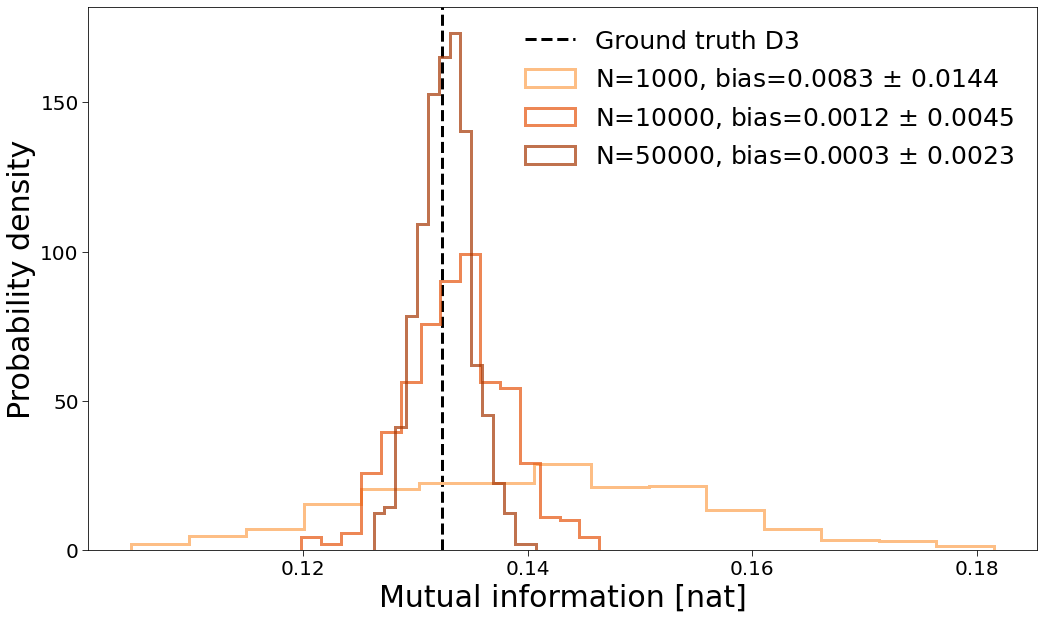

In [89]:
alpha=0.5
bins=15
fontsize=30
Ns=[1000, 10000, 50000]
nbins=5
label = 'D3'
fig, (ax1) = plt.subplots(1, 1, figsize=(17, 10))
colors = ['#fdbe85', '#e6550d', '#a63603']
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label=f'Ground truth {label}')

for i, N in enumerate(Ns):
    analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')
    if N == 1000:
        alpha = 1
    else:
        alpha=0.7
    ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
             label=f'N={N}, bias={np.mean(MI_file[:, 0]-analytic):.4f} $\pm$ {np.std(MI_file[:, 0]-analytic):.4f}', 
             color=colors[i], density='True', histtype='step', lw=3)
    ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
    ax1.set_xlabel('Mutual information [nat]', fontsize=fontsize)
    ax1.set_ylabel('Probability density', fontsize=fontsize)
    ax1.locator_params(nbins=nbins)
    ax1.legend(fontsize=25, frameon=False, loc='upper right')

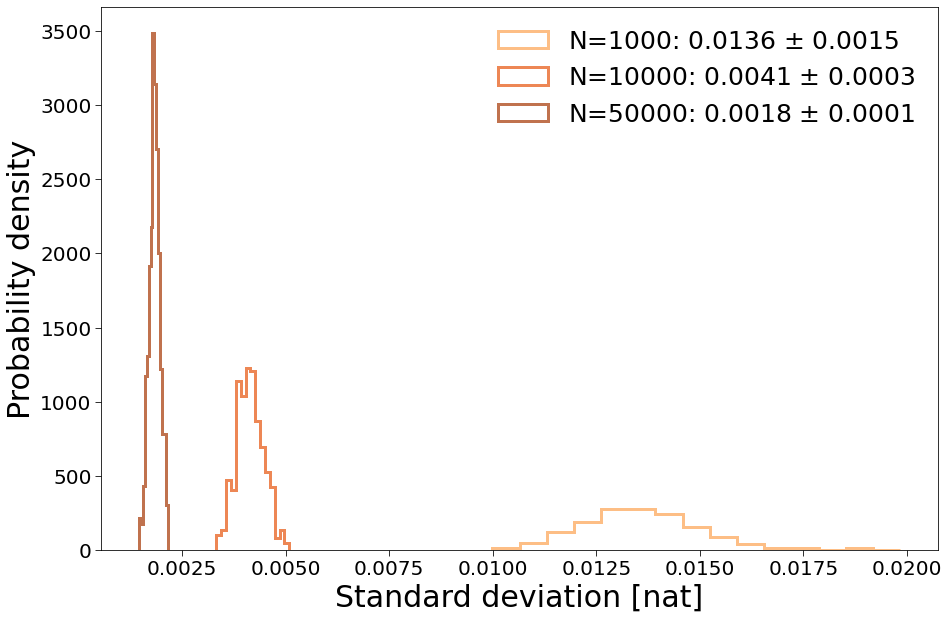

In [90]:
alpha=1
bins=15
fontsize=30
Ns=[1000, 10000, 50000]
nbins=8
label = 'D3'
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
colors = ['#fdbe85', '#e6550d', '#a63603']

for i, N in enumerate(Ns):
    analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')
    if N == 1000:
        alpha = 1
    else:
        alpha=0.7
    ax1.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
             label=f'N={N}: {np.mean(MI_file[:, 1]):.4f} $\pm$ {np.std(MI_file[:, 1]):.4f}', 
             color=colors[i], density='True', histtype='step', lw=3)
    ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
    ax1.set_xlabel('Standard deviation [nat]', fontsize=fontsize)
    ax1.set_ylabel('Probability density', fontsize=fontsize)
    #ax1.locator_params(nbins=nbins)
    ax1.legend(fontsize=25, frameon=False, loc='upper right')

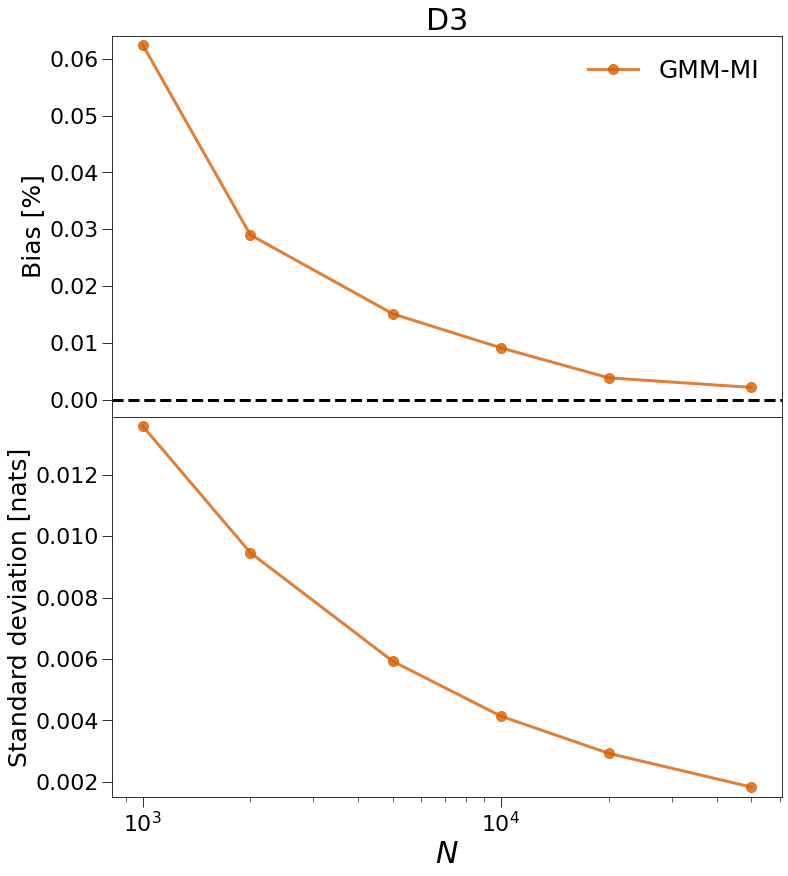

In [3]:
N_values = [1000, 2000, 5000, 10000, 20000, 50000]
MI_values, std_values = [], []

for N in N_values:
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')
    MI_values.append((np.mean( (MI_file[:, 0] - analytic) / analytic)))
    std_values.append(np.mean(MI_file[:, 1]))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), sharex=True)
lw = 3

ax1.tick_params(axis='both', which='major', labelsize=22, size=10)
ax1.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax1.plot(N_values, MI_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax1.legend(fontsize=25, frameon=False)        
ax1.set_ylabel('Bias [%]', fontsize=25)
ax1.set_xscale('log')
ax1.set_title(label, fontsize=30)
ax1.axhline(0, linewidth=3, c='k', linestyle='--')
ax1.set_ylim(0-3e-3, 0.064)

ax2.tick_params(axis='both', which='major', labelsize=22, size=10)
ax2.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax2.plot(N_values, std_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax2.set_ylabel('Standard deviation [nats]', fontsize=25);
ax2.set_xscale('log')
ax2.set_xlabel(r'$N$', fontsize=30)
ax2.set_ylim(0.0015, 0.0139)
fig.subplots_adjust(wspace=0, hspace=0);

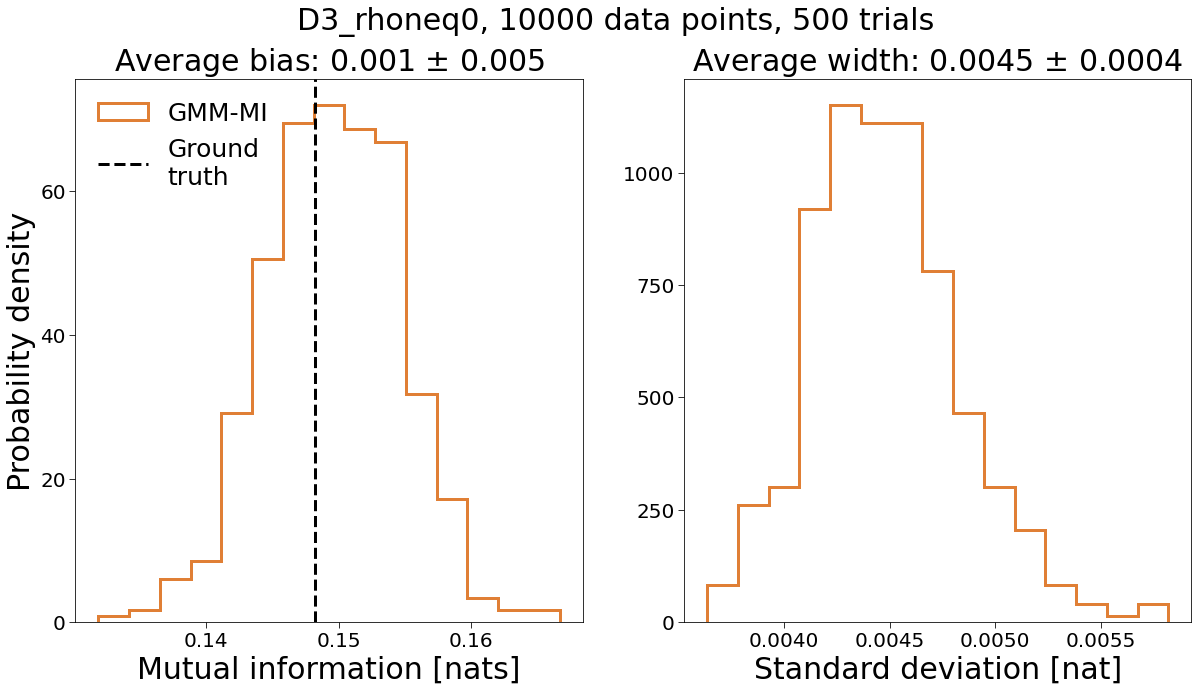

In [32]:
alpha=0.8

bins=15
fontsize=30
N=10000
nbins=5
label = 'D3_rhoneq0'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True', 
         histtype='step', lw=3)
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label='Ground\ntruth')
ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
ax1.set_xlabel('Mutual information [nats]', fontsize=fontsize)
ax1.set_ylabel('Probability density', fontsize=fontsize)
ax1.locator_params(nbins=nbins)
ax1.legend(fontsize=25, frameon=False, loc='upper left')
ax1.set_title(f'Average bias: {np.mean(MI_file[:, 0]-analytic):.3f} $\pm$ {np.std(MI_file[:, 0]-analytic):.3f}', 
              fontsize=30)

ax2.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True',
         histtype='step', lw=3)
ax2.tick_params(axis='both', which='major', labelsize=20, size=6)
ax2.set_xlabel('Standard deviation [nat]', fontsize=fontsize)
ax2.locator_params(nbins=nbins)
ax2.set_title(f'Average width: {np.mean(MI_file[:, 1]):.4f} $\pm$ {np.std(MI_file[:, 1]):.4f}', 
              fontsize=30)


plt.suptitle(f'{label}, {N} data points, 500 trials', fontsize=fontsize);

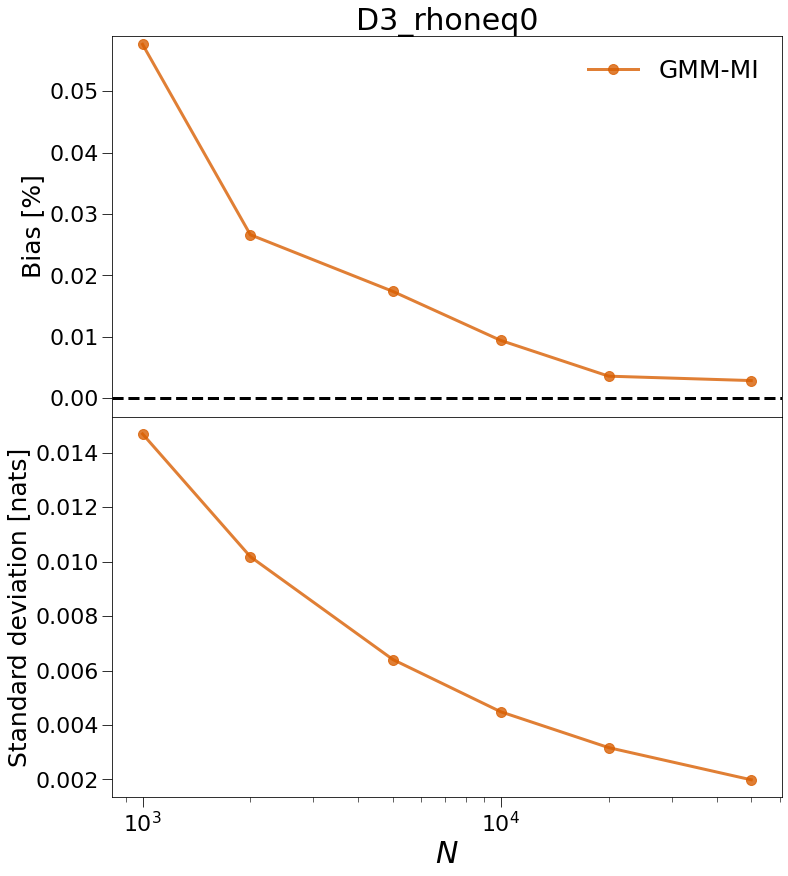

In [5]:
N_values = [1000, 2000, 5000, 10000, 20000, 50000]
MI_values, std_values = [], []
for N in N_values:
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')
    MI_values.append((np.mean( (MI_file[:, 0] - analytic) / analytic)))
    std_values.append(np.mean(MI_file[:, 1]))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), sharex=True)
lw = 3

ax1.tick_params(axis='both', which='major', labelsize=22, size=10)
ax1.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax1.plot(N_values, MI_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax1.legend(fontsize=25, frameon=False)        
ax1.set_ylabel('Bias [%]', fontsize=25)
ax1.set_xscale('log')
ax1.set_title(label, fontsize=30)
ax1.set_ylim(0+1e-10, 0.065)
ax1.axhline(0, linewidth=3, c='k', linestyle='--')
ax1.set_ylim(0-3e-3, 0.059)

ax2.tick_params(axis='both', which='major', labelsize=22, size=10)
ax2.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax2.plot(N_values, std_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax2.set_ylabel('Standard deviation [nats]', fontsize=25);
ax2.set_xscale('log')
ax2.set_xlabel(r'$N$', fontsize=30)
fig.subplots_adjust(wspace=0, hspace=0);

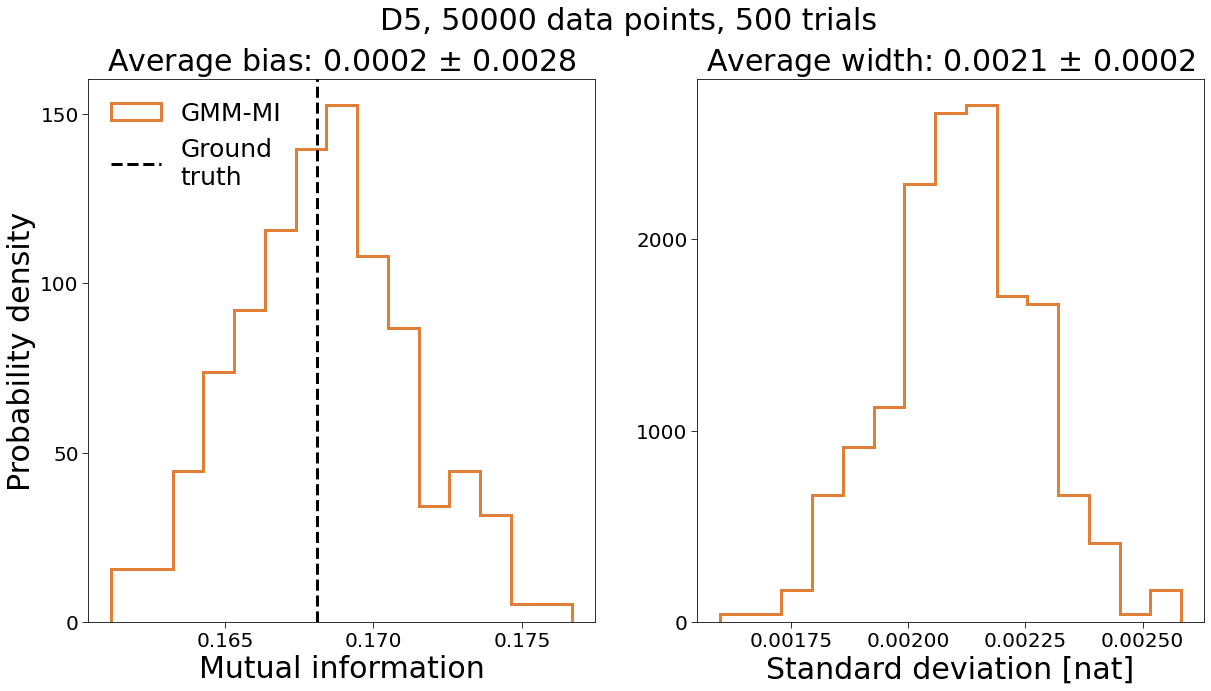

In [70]:
alpha=0.8
bins=15
fontsize=30
N=50000
nbins=5
label = 'D5'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:367]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True', 
         histtype='step', lw=3)
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label='Ground\ntruth')
ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
ax1.set_xlabel('Mutual information', fontsize=fontsize)
ax1.set_ylabel('Probability density', fontsize=fontsize)
ax1.locator_params(nbins=nbins)
ax1.legend(fontsize=25, frameon=False, loc='upper left')
ax1.set_title(f'Average bias: {np.mean(MI_file[:, 0]-analytic):.4f} $\pm$ {np.std(MI_file[:, 0]-analytic):.4f}', 
              fontsize=30)

ax2.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True',
         histtype='step', lw=3)
ax2.tick_params(axis='both', which='major', labelsize=20, size=6)
ax2.set_xlabel('Standard deviation [nat]', fontsize=fontsize)
ax2.locator_params(nbins=nbins)
ax2.set_title(f'Average width: {np.mean(MI_file[:, 1]):.4f} $\pm$ {np.std(MI_file[:, 1]):.4f}', 
              fontsize=30)

plt.suptitle(f'{label}, {N} data points, 500 trials', fontsize=fontsize);

0
0
0
0
0
0


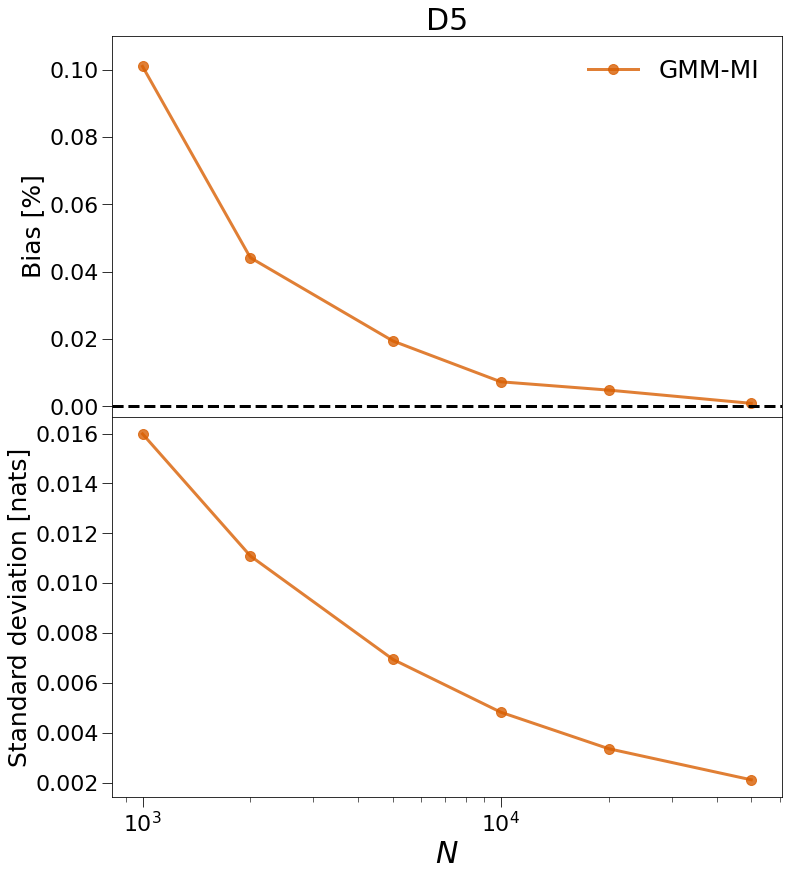

In [71]:
N_values = [1000, 2000, 5000, 10000, 20000, 50000]
MI_values, std_values = [], []
for N in N_values:
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:367]
    print(len(MI_file[MI_file[:, 0] < 0.13]))
    MI_values.append((np.mean(MI_file[:, 0] - analytic) / analytic))
    std_values.append(np.mean(MI_file[:, 1]))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), sharex=True)
lw = 3

ax1.tick_params(axis='both', which='major', labelsize=22, size=10)
ax1.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax1.plot(N_values, MI_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax1.legend(fontsize=25, frameon=False)        
ax1.set_ylabel('Bias [%]', fontsize=25)
ax1.set_xscale('log')
ax1.set_title(label, fontsize=30)
ax1.axhline(0, linewidth=3, c='k', linestyle='--')
ax1.set_ylim(0-3e-3, 0.11)

ax2.tick_params(axis='both', which='major', labelsize=22, size=10)
ax2.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax2.plot(N_values, std_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax2.set_ylabel('Standard deviation [nats]', fontsize=25);
ax2.set_xscale('log')
ax2.set_xlabel(r'$N$', fontsize=30)
fig.subplots_adjust(wspace=0, hspace=0);

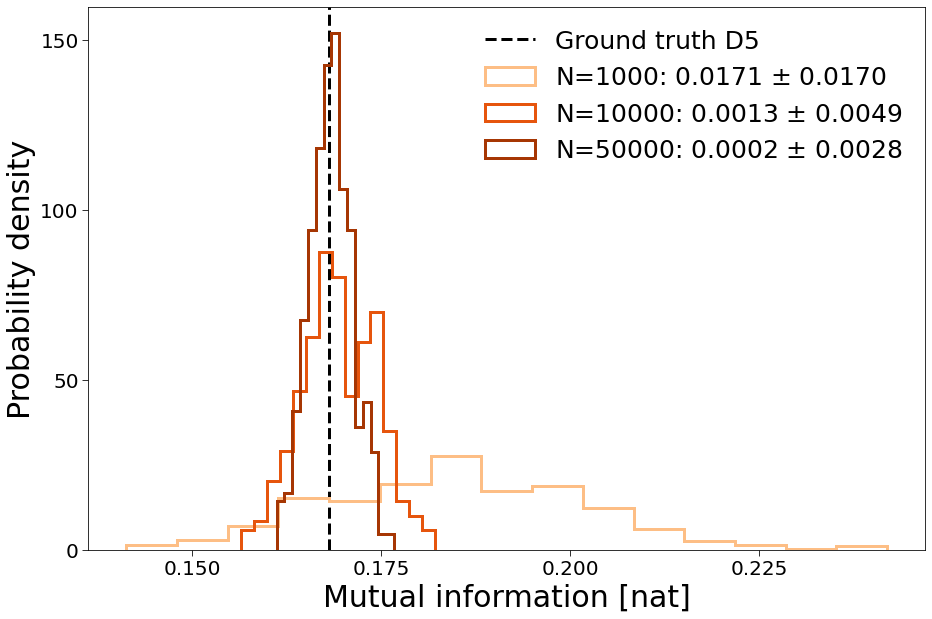

In [73]:
alpha=1
bins=15
fontsize=30
Ns=[1000, 10000, 50000]
nbins=5
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
colors = ['#fdbe85', '#e6550d', '#a63603']
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label=f'Ground truth {label}')

for i, N in enumerate(Ns):
    analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:400]

    ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
             label=f'N={N}: {np.mean(MI_file[:, 0]-analytic):.4f} $\pm$ {np.std(MI_file[:, 0]-analytic):.4f}', 
             color=colors[i], density='True', histtype='step', lw=3)
    ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
    ax1.set_xlabel('Mutual information [nat]', fontsize=fontsize)
    ax1.set_ylabel('Probability density', fontsize=fontsize)
    ax1.locator_params(nbins=nbins)
    ax1.legend(fontsize=25, frameon=False, loc='upper right')

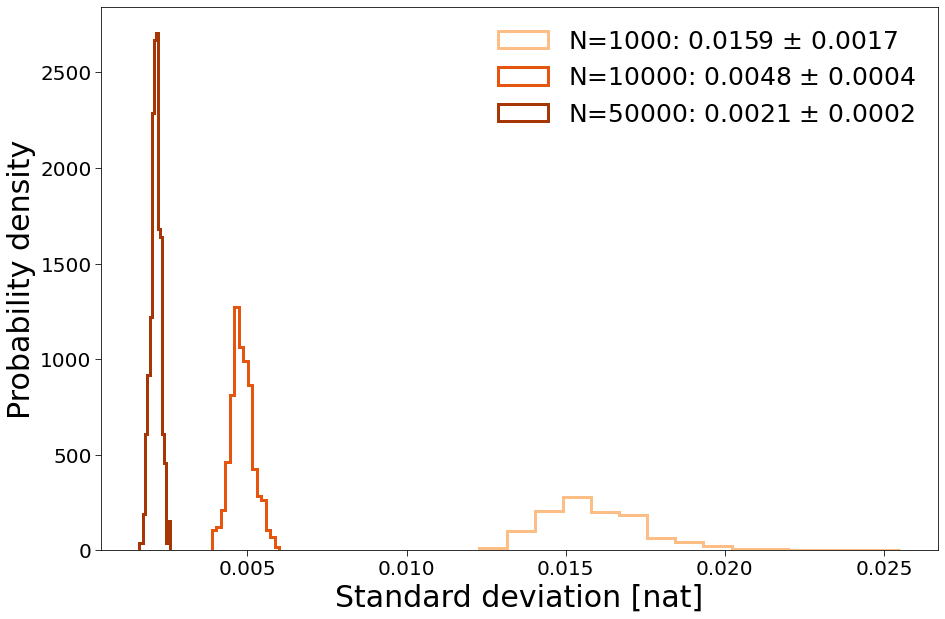

In [75]:
alpha=1
bins=15
fontsize=30
Ns=[1000, 10000, 50000]
nbins=8
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
colors = ['#fdbe85', '#e6550d', '#a63603']

for i, N in enumerate(Ns):
    analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:400]

    ax1.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
             label=f'N={N}: {np.mean(MI_file[:, 1]):.4f} $\pm$ {np.std(MI_file[:, 1]):.4f}', 
             color=colors[i], density='True', histtype='step', lw=3)
    ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
    ax1.set_xlabel('Standard deviation [nat]', fontsize=fontsize)
    ax1.set_ylabel('Probability density', fontsize=fontsize)
    #ax1.locator_params(nbins=nbins)
    ax1.legend(fontsize=25, frameon=False, loc='upper right')

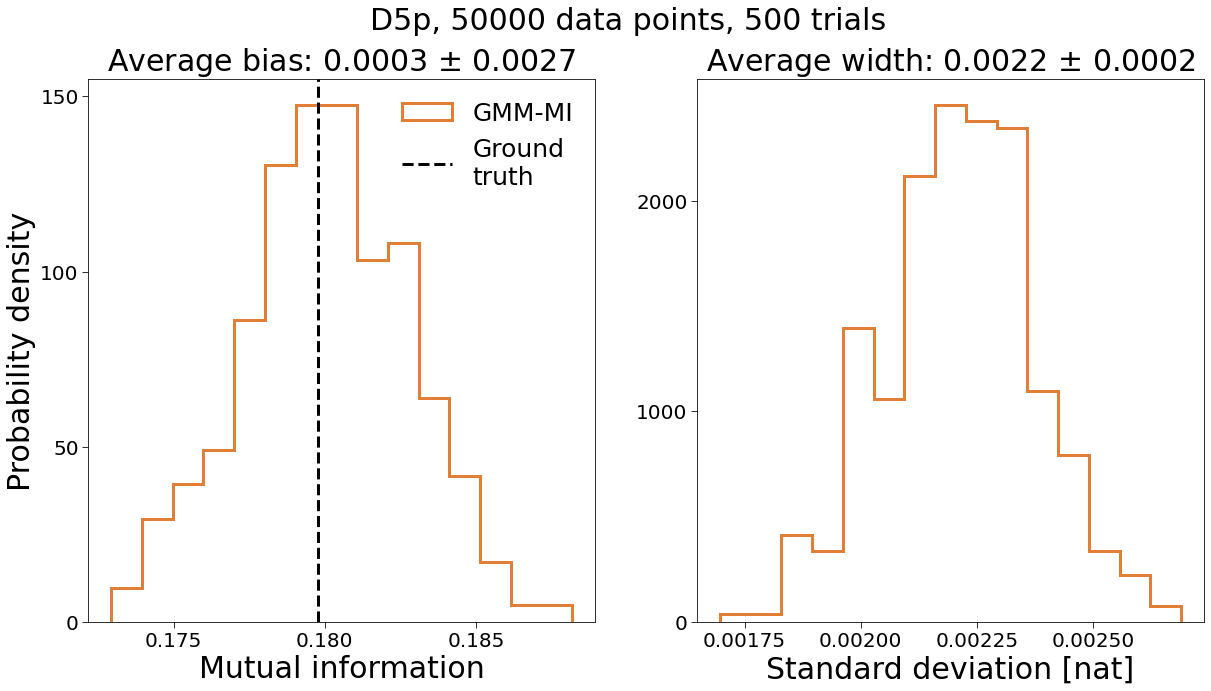

In [76]:
alpha=0.8
bins=15
fontsize=30
N=50000
nbins=5
label = 'D5p'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:400]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True', 
         histtype='step', lw=3)
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label='Ground\ntruth')
ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
ax1.set_xlabel('Mutual information', fontsize=fontsize)
ax1.set_ylabel('Probability density', fontsize=fontsize)
ax1.locator_params(nbins=nbins)
ax1.legend(fontsize=25, frameon=False, loc='upper right')
ax1.set_title(f'Average bias: {np.mean(MI_file[:, 0]-analytic):.4f} $\pm$ {np.std(MI_file[:, 0]-analytic):.4f}', 
              fontsize=30)

ax2.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True',
         histtype='step', lw=3)
ax2.tick_params(axis='both', which='major', labelsize=20, size=6)
ax2.set_xlabel('Standard deviation [nat]', fontsize=fontsize)
ax2.locator_params(nbins=nbins)
ax2.set_title(f'Average width: {np.mean(MI_file[:, 1]):.4f} $\pm$ {np.std(MI_file[:, 1]):.4f}', 
              fontsize=30)

plt.suptitle(f'{label}, {N} data points, 500 trials', fontsize=fontsize);

0
0
0
0
0
0


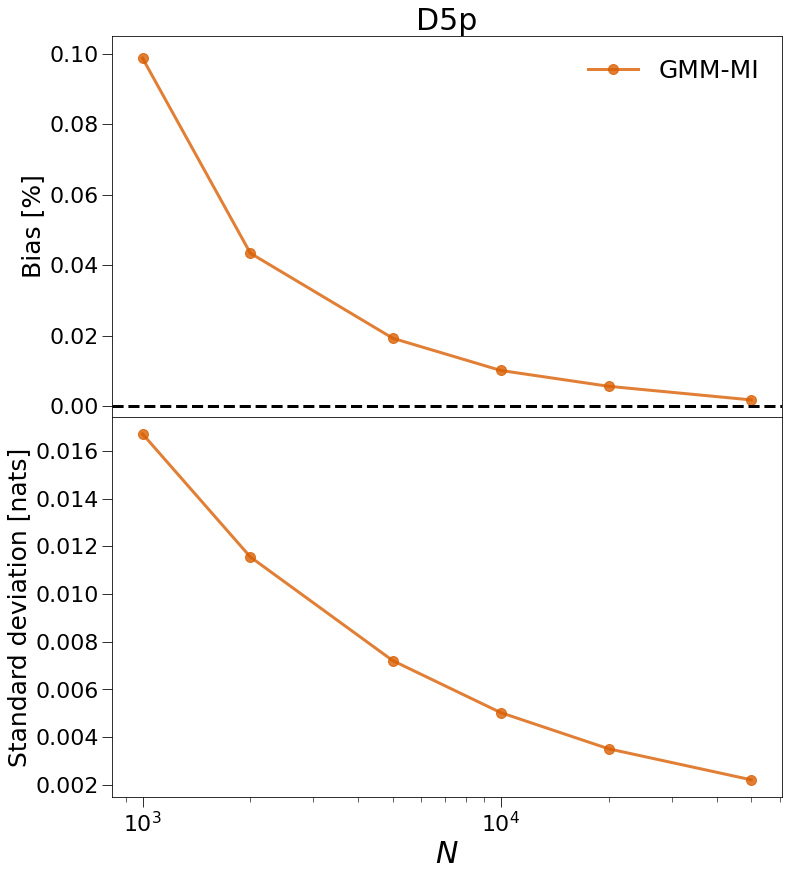

In [77]:
N_values = [1000, 2000, 5000, 10000, 20000, 50000]
MI_values, std_values = [], []
for N in N_values:
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:400]
    print(len(MI_file[MI_file[:, 0] < 0.1]))
    MI_values.append((np.mean(MI_file[:, 0] - analytic) / analytic))
    std_values.append(np.mean(MI_file[:, 1]))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), sharex=True)
lw = 3

ax1.tick_params(axis='both', which='major', labelsize=22, size=10)
ax1.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax1.plot(N_values, MI_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax1.legend(fontsize=25, frameon=False)        
ax1.set_ylabel('Bias [%]', fontsize=25)
ax1.set_xscale('log')
ax1.set_title(label, fontsize=30)
ax1.axhline(0, linewidth=3, c='k', linestyle='--')
ax1.set_ylim(0-3e-3, 0.105)

ax2.tick_params(axis='both', which='major', labelsize=22, size=10)
ax2.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax2.plot(N_values, std_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax2.set_ylabel('Standard deviation [nats]', fontsize=25);
ax2.set_xscale('log')
ax2.set_xlabel(r'$N$', fontsize=30)
fig.subplots_adjust(wspace=0, hspace=0);

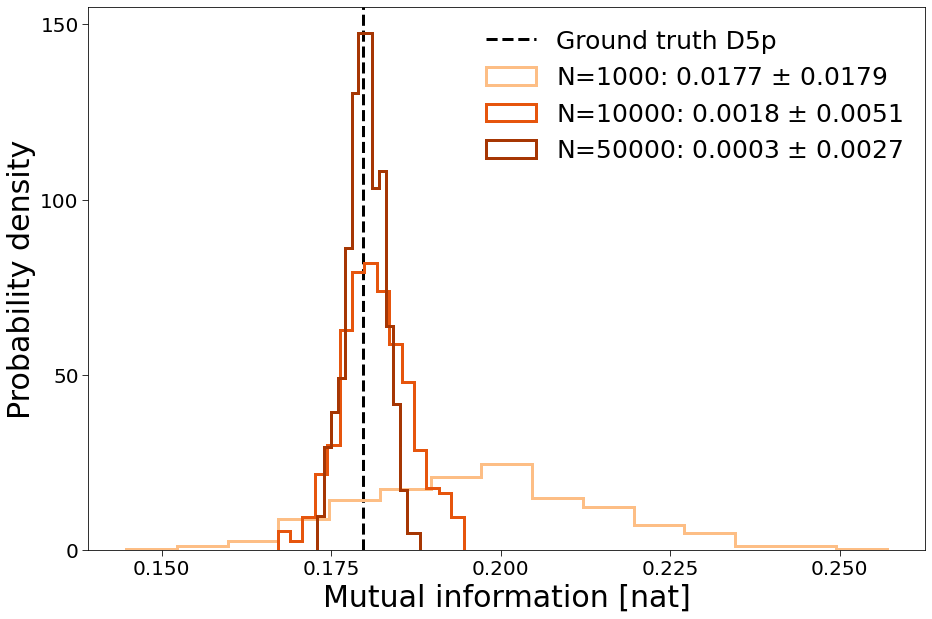

In [78]:
alpha=1
bins=15
fontsize=30
Ns=[1000, 10000, 50000]
nbins=5
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
colors = ['#fdbe85', '#e6550d', '#a63603']
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label=f'Ground truth {label}')

for i, N in enumerate(Ns):
    analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:400]

    ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
             label=f'N={N}: {np.mean(MI_file[:, 0]-analytic):.4f} $\pm$ {np.std(MI_file[:, 0]-analytic):.4f}', 
             color=colors[i], density='True', histtype='step', lw=3)
    ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
    ax1.set_xlabel('Mutual information [nat]', fontsize=fontsize)
    ax1.set_ylabel('Probability density', fontsize=fontsize)
    ax1.locator_params(nbins=nbins)
    ax1.legend(fontsize=25, frameon=False, loc='upper right')

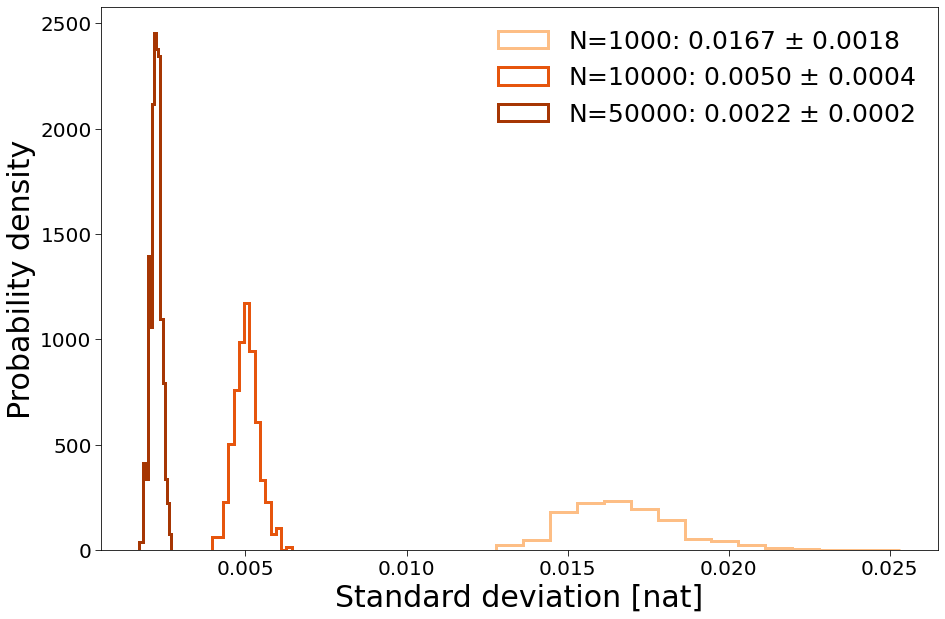

In [79]:
alpha=1
bins=15
fontsize=30
Ns=[1000, 10000, 50000]
nbins=8
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
colors = ['#fdbe85', '#e6550d', '#a63603']

for i, N in enumerate(Ns):
    analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:400]

    ax1.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
             label=f'N={N}: {np.mean(MI_file[:, 1]):.4f} $\pm$ {np.std(MI_file[:, 1]):.4f}', 
             color=colors[i], density='True', histtype='step', lw=3)
    ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
    ax1.set_xlabel('Standard deviation [nat]', fontsize=fontsize)
    ax1.set_ylabel('Probability density', fontsize=fontsize)
    #ax1.locator_params(nbins=nbins)
    ax1.legend(fontsize=25, frameon=False, loc='upper right')